# Questions
## 1. Which attack type would be used in the next global terrorist attack?
## 2. Which variables best predict attack type?

### Import Packages and Data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [7]:
data= pd.read_csv("globalterrorismdb_0617dist.csv",encoding='ISO-8859-1', low_memory=False)

In [3]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96927 entries, 0 to 96926
Columns: 135 entries, eventid to related
dtypes: float64(70), int64(7), object(58)
memory usage: 99.8+ MB


In [5]:
data.isnull().sum()

eventid                   0
iyear                     0
imonth                    0
iday                      0
approxdate            96620
extended                  0
resolution            94900
country                   0
country_txt               0
region                    0
region_txt                0
provstate             14498
city                    367
latitude               4146
longitude              4146
specificity               2
vicinity                  1
location              81570
summary               66139
crit1                     1
crit2                     1
crit3                     1
doubtterr                 1
alternative           82801
alternative_txt       82801
multiple                  1
success                   1
suicide                   1
attacktype1               1
attacktype1_txt           1
                      ...  
propextent            64148
propextent_txt        64148
propvalue             85563
propcomment           81002
ishostkid           

### Data Cleaning

#### Remove Columns That Are Not Relevant in Predicting Attack Type Based On Our Intuitions

In [8]:
data2= data[["eventid", "iyear", "imonth", "crit1", "crit2", \
             "crit3", "doubtterr", "multiple", "country", \
             "country_txt", "region", "region_txt", "attacktype1", \
             "attacktype1_txt", "success", "weaptype1", \
             "weaptype1_txt", "suicide", \
             "targtype1", "targtype1_txt", "target1", \
             "natlty1", "gname", \
             "INT_LOG", "INT_IDEO", "latitude", "longitude"]]

#### Remove Observations Whose Exact Month of Incident is Unknown (imonth = 0)

In [9]:
data2 = data2[data2["imonth"] != 0]

In [8]:
print(data2.imonth.unique())

[ 7  1  2  3  4  5  6  8  9 10 11 12]


#### Remove Observations Whose Country is Unknown (country = Unknown)

In [10]:
data2 = data2[data2["country_txt"] != "Unknown"]

In [10]:
data2.isnull().sum()

eventid               0
iyear                 0
imonth                0
crit1                 1
crit2                 1
crit3                 1
doubtterr             1
multiple              1
country               0
country_txt           0
region                0
region_txt            0
attacktype1           1
attacktype1_txt       1
success               1
weaptype1             1
weaptype1_txt         1
suicide               1
targtype1             1
targtype1_txt         1
target1             615
natlty1             518
gname                 1
INT_LOG               1
INT_IDEO              1
latitude           4142
longitude          4142
dtype: int64

In [11]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96907 entries, 0 to 96926
Data columns (total 27 columns):
eventid            96907 non-null int64
iyear              96907 non-null int64
imonth             96907 non-null int64
crit1              96906 non-null float64
crit2              96906 non-null float64
crit3              96906 non-null float64
doubtterr          96906 non-null float64
multiple           96906 non-null float64
country            96907 non-null int64
country_txt        96907 non-null object
region             96907 non-null int64
region_txt         96907 non-null object
attacktype1        96906 non-null float64
attacktype1_txt    96906 non-null object
success            96906 non-null float64
weaptype1          96906 non-null float64
weaptype1_txt      96906 non-null object
suicide            96906 non-null float64
targtype1          96906 non-null float64
targtype1_txt      96906 non-null object
target1            96292 non-null object
natlty1            96389 

#### Remove Observations Whose Attack Type is Unknown (attacktype1_txt = Unknown)

In [11]:
data2 = data2[data2["attacktype1_txt"] != "Unknown"]

#### Remove Observations Whose Weapon Type is Unknown (weaptype1_txt = Unknown)

In [12]:
data2 = data2[data2["weaptype1_txt"] != "Unknown"]

### Exploratory Analysis

#### Checking If the Categories With Smaller Counts Have Sufficient Observations for Modeling

In [14]:
print(len(data2[data2["attacktype1_txt"] == "Unarmed Assault"]))
print(len(data2[data2["attacktype1_txt"] == "Hijacking"]))
print(len(data2[data2["attacktype1_txt"] == "Hostage Taking (Barricade Incident)"]))

594
319
536


#### Examining the Distribution of Attack Type

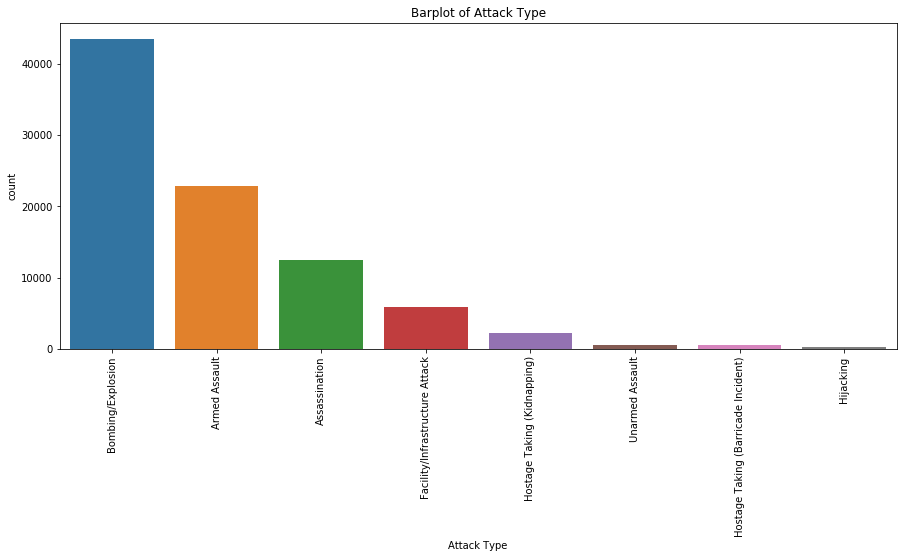

In [15]:
plt.subplots(figsize=(15, 6))
sns.countplot(data2.attacktype1_txt, order = data2.attacktype1_txt.value_counts().index)
plt.xticks(rotation = 90)
plt.title("Barplot of Attack Type")
plt.xlabel("Attack Type")
plt.show()

From the barplot, terrorist attacks in the form of bombing/ explosion happened with the highest frequency, followed by armed assault and assassination. Terrorist attacks in the form of facility/ infrastructure attack and hostage taking (kidnapping) also occurred with moderate frequencies. Hijacking, unarmed assault, and hostage taking (barricade incident) happened relatively less frequently.

#### Examining the Trend of Terrorist Attack

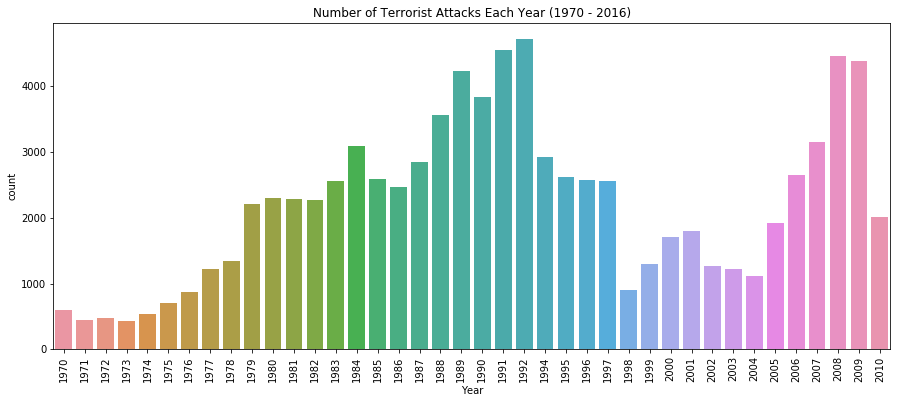

In [16]:
plt.subplots(figsize=(15,6))
sns.countplot(data2.iyear)
plt.xticks(rotation = 90)
plt.title("Number of Terrorist Attacks Each Year (1970 - 2016)")
plt.xlabel("Year")
plt.show()

The plot shows a clear increasing trend in the number of terrorist attacks, peaking in 2014

According to the plot, the distribution of terrorist attacks by month is relatively uniform 

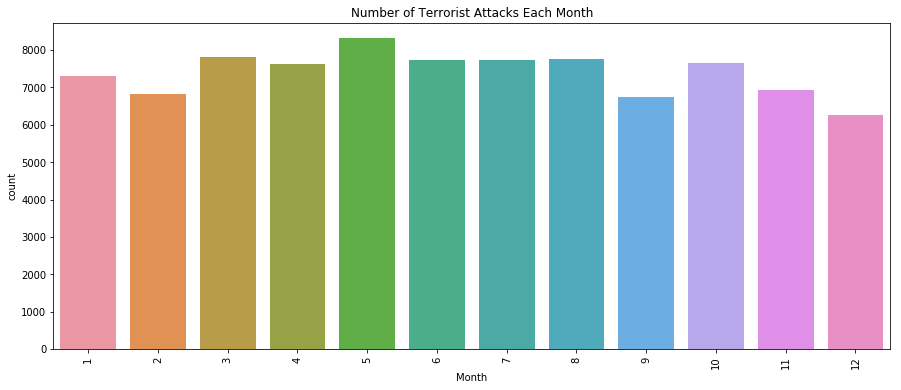

In [17]:
plt.subplots(figsize=(15,6))
sns.countplot(data2.imonth)
plt.xticks(rotation = 90)
plt.title("Number of Terrorist Attacks Each Month")
plt.xlabel("Month")
plt.show()

#### Examining Distribution of Terrorist Attacks By Year and Regions

In [18]:
data2.pivot_table(index = "region_txt", columns = "iyear", values = "eventid", aggfunc = "count", fill_value = 0)

iyear,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
region_txt,,,,,,,,,,,,,,,,,,,,,
Australasia & Oceania,1,1,2,1,1,0,0,0,2,2,...,4,2,4,0,0,2,1,8,1,1
Central America & Caribbean,1,4,3,3,9,9,41,16,151,398,...,8,3,8,5,3,5,4,0,9,0
Central Asia,0,0,0,0,0,0,0,0,0,0,...,18,6,7,8,9,6,4,34,29,2
East Asia,2,1,0,2,4,12,2,1,35,14,...,20,4,6,4,2,1,0,25,8,0
Eastern Europe,12,4,1,1,1,0,0,2,2,1,...,236,110,99,44,75,65,60,206,162,85
Middle East,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Middle East & North Africa,22,46,30,18,40,39,51,208,120,412,...,349,320,282,467,847,1148,1370,1492,1336,551
North America,469,246,67,61,107,153,117,144,106,74,...,48,33,33,12,21,14,19,30,15,11
South America,43,14,15,52,61,49,78,89,170,176,...,188,139,107,38,46,40,46,128,152,70


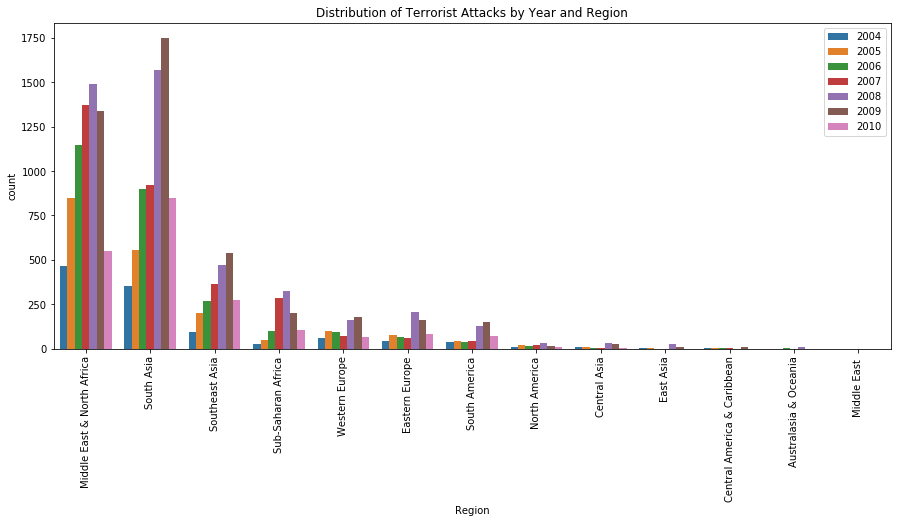

In [19]:
plt.subplots(figsize=(15,6))
sns.countplot(data2.region_txt[data2.iyear.isin(np.arange(2004, 2017, 1))],\
              hue = data2.iyear[data2.iyear.isin(np.arange(2004, 2017, 1))],\
              order = data2.region_txt[data2.iyear.isin(np.arange(2004, 2017, 1))].value_counts().index)
plt.xticks(rotation = 90)
plt.legend(loc = "upper right")
plt.title("Distribution of Terrorist Attacks by Year and Region")
plt.xlabel("Region")
plt.show()

#### Examining Distribution of Attack Types By Year

In [20]:
data2.pivot_table(index = "attacktype1_txt", columns = "iyear", values = "eventid", aggfunc = "count", fill_value = 0)

iyear,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
attacktype1_txt,,,,,,,,,,,,,,,,,,,,,
Armed Assault,61,44,63,62,46,81,124,255,241,442,...,580,364,308,256,506,735,846,1081,1101,453
Assassination,17,67,191,158,155,177,198,141,244,442,...,126,71,84,101,218,138,137,202,220,144
Bombing/Explosion,333,238,187,149,281,369,418,630,639,1047,...,801,721,680,655,1062,1500,1863,2660,2566,1157
Facility/Infrastructure Attack,174,88,18,36,42,64,113,180,177,179,...,141,47,86,30,43,103,115,272,336,160
Hijacking,8,3,6,4,3,0,2,5,0,9,...,14,5,3,1,2,3,7,12,17,3
Hostage Taking (Barricade Incident),3,1,4,7,5,11,6,12,39,60,...,4,4,1,3,0,6,6,2,4,4
Hostage Taking (Kidnapping),3,1,6,7,4,5,3,2,3,18,...,84,51,35,59,76,143,167,189,114,88
Unarmed Assault,3,0,0,3,4,0,3,0,5,7,...,41,10,20,4,6,15,6,33,19,8


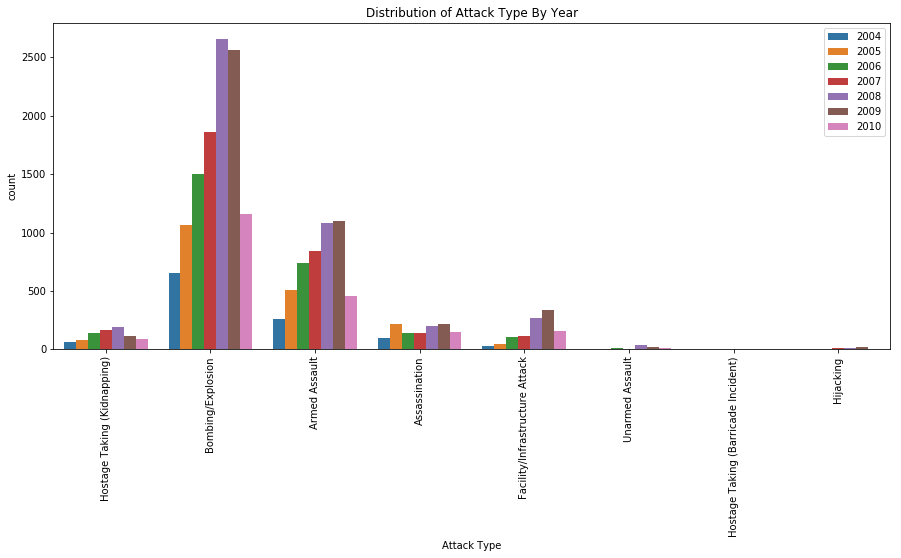

In [21]:
plt.subplots(figsize=(15,6))
sns.countplot(data2.attacktype1_txt[data2.iyear.isin(np.arange(2004, 2017, 1))],\
              hue = data2.iyear[data2.iyear.isin(np.arange(2004, 2017, 1))])
plt.xticks(rotation = 90)
plt.legend(loc = "upper right")
plt.title("Distribution of Attack Type By Year")
plt.xlabel("Attack Type")
plt.show()

#### Examining Distribution of Attack Types By Month

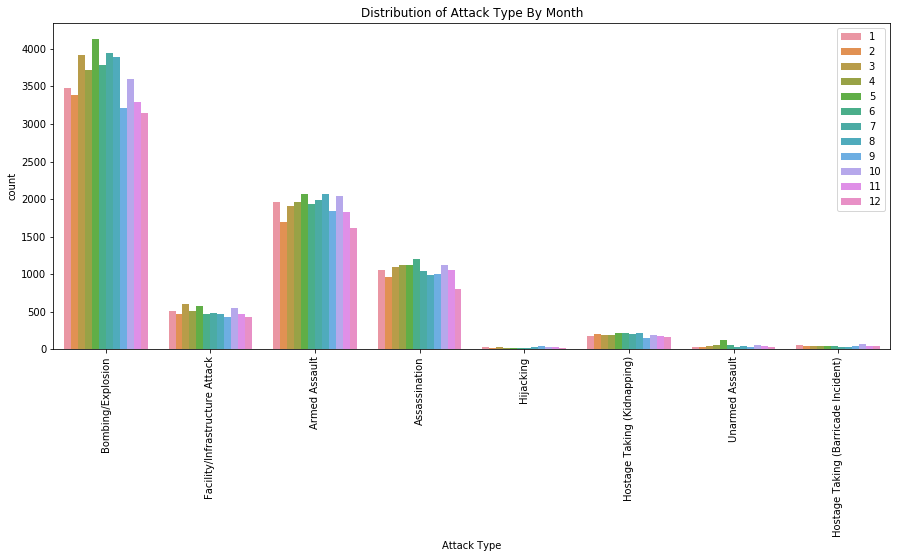

In [22]:
plt.subplots(figsize=(15,6))
sns.countplot(data2.attacktype1_txt,\
              hue = data2.imonth)
plt.xticks(rotation = 90)
plt.legend(loc = "upper right")
plt.title("Distribution of Attack Type By Month")
plt.xlabel("Attack Type")
plt.show()

#### Examining Distribution of Terrorist Attacks by Month and Regions

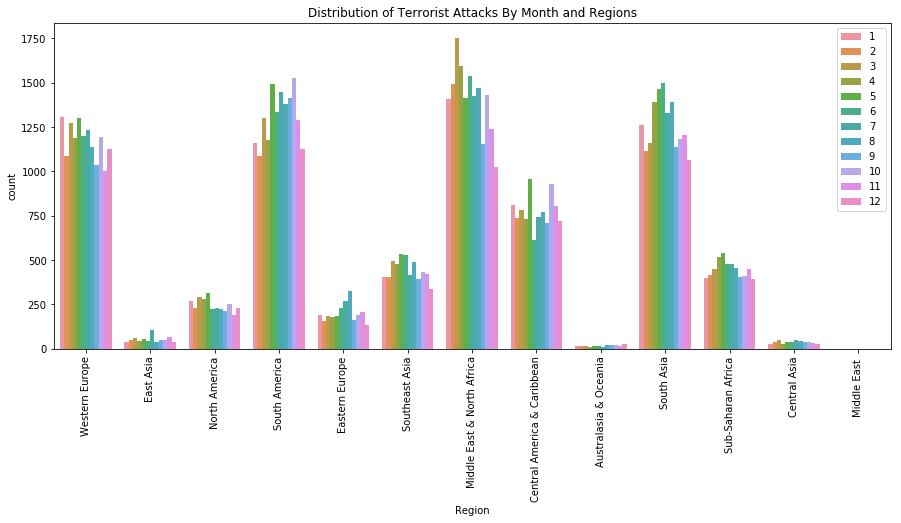

In [23]:
plt.subplots(figsize=(15,6))
sns.countplot(data2.region_txt,\
              hue = data2.imonth)
plt.xticks(rotation = 90)
plt.legend(loc = "upper right")
plt.title("Distribution of Terrorist Attacks By Month and Regions")
plt.xlabel("Region")
plt.show()

The distribution is relatively uniform for most the regions, but there may be some trends for regions such as South America, Middle East and North Africa, and South Asia

Also, there are usually spikes in every other month starting from January, suggesting a possibility of patterns in terrorist attacks

### Multinomial Logistic Regression

#### Creating X and y Variables

In [24]:
X_temp = data2.loc[:,["imonth", "crit1", "crit2", "crit3", "multiple", \
          "country_txt", "region_txt", "weaptype1_txt", \
          "suicide", "targtype1_txt", "target1", \
          "gname", "attacktype1_txt"]]
X_temp2 = X_temp.dropna()
X = X_temp2.loc[:,["imonth", "crit1", "crit2", "crit3", "multiple", \
          "country_txt", "region_txt", "weaptype1_txt", \
          "suicide", "targtype1_txt", "target1", \
          "gname"]]

In [25]:
X["target1"] = X["target1"].astype(str)
X["gname"] = X["gname"].astype(str)

In [26]:
y_temp = X_temp2.loc[:,"attacktype1_txt"]

In [27]:
group = y_temp.unique()
print(group)

['Bombing/Explosion' 'Facility/Infrastructure Attack' 'Armed Assault'
 'Assassination' 'Hijacking' 'Hostage Taking (Kidnapping)'
 'Unarmed Assault' 'Hostage Taking (Barricade Incident)']


In [28]:
# Binarize the output
y = label_binarize(y_temp, classes=group)
n_classes = y.shape[1]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 40)

In [30]:
print(y_train.shape)
print(X_train.shape)

(52873, 8)
(52873, 12)


In [31]:
print(y_temp.head())
print(y)

3                 Bombing/Explosion
4    Facility/Infrastructure Attack
5                     Armed Assault
6                     Assassination
7                 Bombing/Explosion
Name: attacktype1_txt, dtype: object
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [32]:
le=LabelEncoder()

# Iterating over all the common columns in train and test
for col in X_test.columns.values:
    # Encoding only categorical variables
    if X_test[col].dtypes=='object':
    # Using whole data to form an exhaustive list of levels
        data3 = X_train[col].append(X_test[col])
        le.fit(data3.values)
        X_train[col] = le.transform(X_train[col])
        X_test[col] = le.transform(X_test[col])

/Users/tessabbey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/tessabbey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


logreg = LogisticRegression(multi_class='ovr')

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred))

accuracy_score(y_test,logreg.predict(X_test))

In [48]:
!pip install plotly


    100% |████████████████████████████████| 25.0MB 33kB/s  eta 0:00:01    75% |████████████████████████▏       | 18.9MB 10.4MB/s eta 0:00:01
  Running setup.py bdist_wheel for plotly ... done
  Stored in directory: /Users/tessabbey/Library/Caches/pip/wheels/0c/3e/07/4848195c61f659184ca41d5a614845a018ab2d2f2a705b9998
Successfully built plotly
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [13]:
data3= data2['iyear'] >=2000
data3=data2[data3]

In [18]:
import plotly
plotly.tools.set_credentials_file(username='tabbey14', api_key='jsOhl2fOpN3IQVSf1cdN')
import plotly.plotly as py
import pandas as pd


data4 = [ dict(
    lat = data3['latitude'],
    lon = data3['longitude'],
    text = data3['attacktype1_txt'],
    marker = dict(
        color = data3['attacktype1'].values,
        colorscale = "Viridis",
        reversescale = True,
        opacity = 0.7,
        size = 10,
        colorbar = dict(
            thickness = 10,
            titleside = "right",
            outlinecolor = "Viridis",
            ticktext= data3['attacktype1_txt']
        ),
    ),
    type = 'scattergeo'
) ]

layout = dict(
    geo = dict(
        scope = 'world',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        projection = dict(
            type = 'conic conformal',
            rotation = dict(
                lon = -100
            )
        ),
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ -140.0, -55.0 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ 20.0, 60.0 ],
            dtick = 5
        )
    ),
    title = 'World Distribution of Attack Type 2000-2016',
)
fig = { 'data':data4, 'layout':layout }
py.iplot(fig, filename='terrorattacks')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~tabbey14/0 or inside your plot.ly account where it is named 'terrorattacks'


In [ ]:
#It appears that North America has had more infrastructure attacks from 2000 to 
#Where as the rest of the world has more bombings/armed assaults

In [21]:
data4=data2['iyear']<2000
data4=data2[data4]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88674 entries, 3 to 96926
Data columns (total 27 columns):
eventid            88674 non-null int64
iyear              88674 non-null int64
imonth             88674 non-null int64
crit1              88673 non-null float64
crit2              88673 non-null float64
crit3              88673 non-null float64
doubtterr          88673 non-null float64
multiple           88673 non-null float64
country            88674 non-null int64
country_txt        88674 non-null object
region             88674 non-null int64
region_txt         88674 non-null object
attacktype1        88673 non-null float64
attacktype1_txt    88673 non-null object
success            88673 non-null float64
weaptype1          88673 non-null float64
weaptype1_txt      88673 non-null object
suicide            88673 non-null float64
targtype1          88673 non-null float64
targtype1_txt      88673 non-null object
target1            88123 non-null object
natlty1            88290 

In [23]:

data5 = [ dict(
    lat = data4['latitude'],
    lon = data4['longitude'],
    text = data4['attacktype1_txt'],
    marker = dict(
        color = data4['attacktype1'].values,
        colorscale = "Viridis",
        reversescale = True,
        opacity = 0.7,
        size = 10,
        colorbar = dict(
            thickness = 10,
            titleside = "right",
            outlinecolor = "Viridis",
            ticktext= data4['attacktype1_txt']
        ),
    ),
    type = 'scattergeo'
) ]

layout = dict(
    geo = dict(
        scope = 'world',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        projection = dict(
            type = 'conic conformal',
            rotation = dict(
                lon = -100
            )
        ),
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ -140.0, -55.0 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ 20.0, 60.0 ],
            dtick = 5
        )
    ),
    title = 'World Distribution of Attack Type 1970-2000',
)
fig = { 'data':data5, 'layout':layout }
py.iplot(fig, filename='terrorattacks2')

/Users/tessabbey/anaconda3/lib/python3.6/site-packages/plotly/plotly/plotly.py:224: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



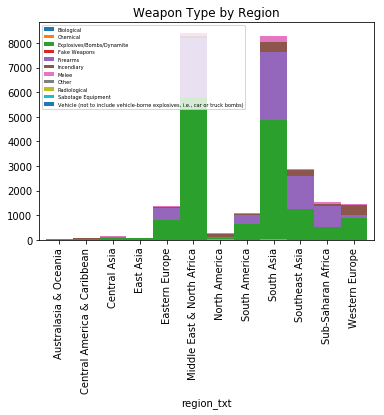

In [85]:
#Attack weapon by region

plt.figure(figsize=(10,5))
plot=pd.crosstab(data2.region_txt, data2.weaptype1_txt).plot.bar(stacked=True, width=1)
plot.legend(loc=2, prop={'size': 5})
plt.title('Weapon Type by Region')
plt.show()

In [86]:
#The most attacks happen in the Middle East & North Africa and South Asia 
#We also see that the vast majority of attacks are either done with expolissives/bombs/dynamite and firearms 